### Credits: Data obtained from https://github.com/fivethirtyeight/data/tree/master/births

In [1]:
import pandas as pd

In [2]:
df_past = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/births/US_births_2000-2014_SSA.csv")

In [3]:
df_past.describe()
# no missing values

,year,month,date_of_month,day_of_week,births
count,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000
mean,2006.999270,6.522723,15.730243,3.999817,11350.068261
std,4.321085,3.449075,8.801151,2.000502,2325.821049
min,2000.000000,1.000000,1.000000,1.000000,5728.000000
25%,2003.000000,4.000000,8.000000,2.000000,8740.000000
50%,2007.000000,7.000000,16.000000,4.000000,12343.000000
75%,2011.000000,10.000000,23.000000,6.000000,13082.000000
max,2014.000000,12.000000,31.000000,7.000000,16081.000000


In [4]:
len(df_past), len(df_past.columns)

(5479, 5)

In [5]:
df_past.head()

,year,month,date_of_month,day_of_week,births
0,2000,1,1,6,9083
1,2000,1,2,7,8006
2,2000,1,3,1,11363
3,2000,1,4,2,13032
4,2000,1,5,3,12558


#### Data Description
1. year	Year
2. month	Month
3. date_of_month	Day number of the month
4. day_of_week	Day of week, where 1 is Monday and 7 is Sunday
5. births	Number of births

### Let's see the no of births over years, months, date, day

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [7]:
def plot_bar_chart(df, x_column):
    # Get current size
    fig_size = plt.rcParams["figure.figsize"]

    # Set figure width to 12 and height to 9
    fig_size[0] = 9
    fig_size[1] = 5
    plt.rcParams["figure.figsize"] = fig_size
    style.use('ggplot')

    fig,ax = plt.subplots()
    ax.bar(df[x_column], df["births"], color='b', width=0.6, align='center')
    ax.set_xticks(df[x_column] + 0.15)
    ax.set_xticklabels(df[x_column])
    plt.show()

Grouping by  year


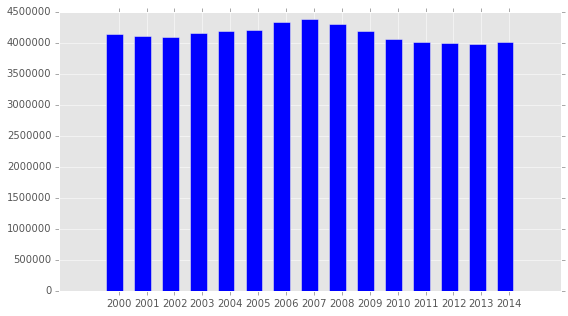

Grouping by  month


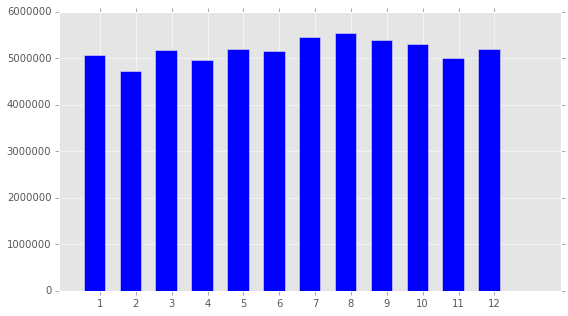

Grouping by  date_of_month


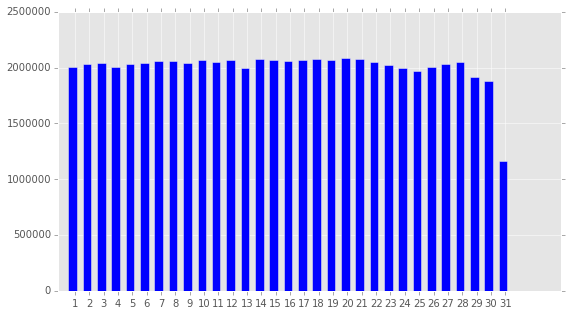

Grouping by  day_of_week


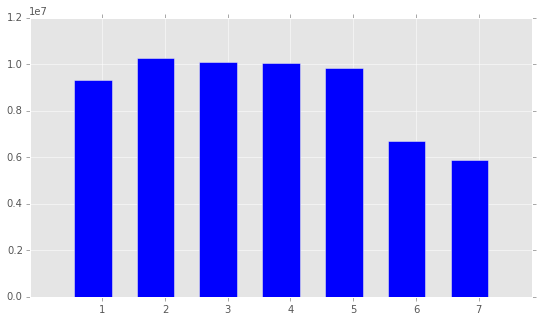

In [8]:
for grp_column in ["year", "month", "date_of_month", "day_of_week"]:
    df_grp = df_past.groupby([grp_column], as_index=False).agg({"births": sum})
    print "Grouping by ", grp_column
    plot_bar_chart(df_grp, grp_column)

#### Less no of births on sunday and 31st

### will check for the pattern of birth dates which falls on same date and same month like 10-10-1996

In [9]:
grp_columns = ["month", "date_of_month"]
df = df_past.groupby(grp_columns, as_index=False).agg({"births": sum})

In [10]:
same_date_month = []
for i in range(13):
    dte_pattern = str(i+1) + "-" + str(i+1)
    same_date_month.append(dte_pattern)

In [11]:
df['date_month'] = df['date_of_month'].astype('str') + "-" + df['month'].astype('str')
df = df[df['date_month'].isin(same_date_month)]

In [12]:
df_pattern = df[['month', 'births']].reset_index(drop=True)
df_pattern

,month,births
0,1,116030
1,2,166066
2,3,166872
3,4,174347
4,5,166073
5,6,173566
6,7,183246
7,8,186328
8,9,184662
9,10,180271


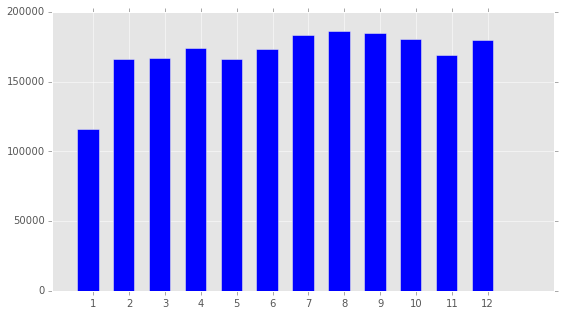

In [13]:
plot_bar_chart(df_pattern, 'month')

#### Less no of births in Jan 1st for this pattern

In [14]:
df_pattern.sort('births', ascending=False)

,month,births
7,8,186328
8,9,184662
6,7,183246
9,10,180271
11,12,179554
3,4,174347
5,6,173566
10,11,168687
2,3,166872
4,5,166073


#### very clear that more no of births happened in the pattern 08-08, 09-09, 07-07

#### will see how may people cele

In [15]:
df_feb = df_past[df_past['month'] == 2]
df_feb = df_feb[df_feb['date_of_month'] == 29]
df_feb

,year,month,date_of_month,day_of_week,births
59,2000,2,29,2,11895
1520,2004,2,29,7,7301
2981,2008,2,29,5,11631
4442,2012,2,29,3,11042


In [16]:
df_feb['births'].sum()

41869

#### 41869 people celebrate their birthday once in 4 years, they never get old :), power of leap year